In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(taxi_tickets.shape)
print(taxi_tickets.dtypes)
taxi_tickets.head()

(261936, 16)
Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


## Ticket Fine Schedule

Pulled from city of Chicago website: [Parking Violations](http://www.cityofchicago.org/city/en/depts/fin/supp_info/revenue/general_parking_ticketinformation/violations.html)

Three codes weren't matched up evenly, mainly because of specificity:
* 0964190 - Expired meter, normally only specified as central business or not, assuming non-business here at \$50.00
* 0964125 - No city sticker or improper display, listed as more specific by size, going with smaller size vehicle at \$200.00
* 0964050J - Disabled parking zone, normal code doesn't have the "J" at the end, using its price at \$250.00

Several ticket types had their fine amounts modified in a new city budget which took effect April of 2014, and will be adjusted. No official source found currently for the specifics, pulled from this [Chicago Tribune article](http://www.chicagotribune.com/news/local/politics/chi-emanuel-to-call-for-higher-parking-fines-towing-fees-20131022-story.html) (excluding those which aren't at the described price currently):

* 0964170A - Previously \$25, but \$75 after April 2014
* 0964050/0964050J - Previously \$200, but \$250 after April 2014
* 0964080A - Previously \$60, but \$100 after April 2014
* 0964100A - Previously \$100, but \$150 after April 2014

Additionally, it seems that there was a proposal to increase the street cleaning violation (9105020) from \$50 to \$60, but it's still \$50 so that's not being included

In [19]:
ticket_fines = pd.read_csv('taxi_ticket_data/chi_parking_fines.csv')
print(ticket_fines.shape)
print(ticket_fines.dtypes)
ticket_fines.head()

(143, 3)
Code            object
Description     object
Fine           float64
dtype: object


,Code,Description,Fine
0,0912060,"STAND, PARK, OR OTHER USE OF BUS LANE",90.0
1,0912060B,"STAND, PARK, OR OTHER USE OF BUS LANE",90.0
2,0940060,PARK/STAND ON BICYCLE PATH,150.0
3,0940080,PARKED/STANDING UNATTENDED W/MOTOR RUNNI,75.0
4,0940170,UNSAFE CONDITION,25.0


In [20]:
ticket_fines = ticket_fines[['Code', 'Fine']]
ticket_fines = ticket_fines.rename(columns={'Code': 'Violation Code','Fine': 'Ticket Fine'})
ticket_fines.head()

,Violation Code,Ticket Fine
0,0912060,90.0
1,0912060B,90.0
2,0940060,150.0
3,0940080,75.0
4,0940170,25.0


In [21]:
print(taxi_tickets.shape)
taxi_ticket_fines = taxi_tickets.merge(ticket_fines, how='left', on='Violation Code')
print(taxi_ticket_fines.dtypes)
print(taxi_ticket_fines.shape)
taxi_ticket_fines.head()

(261936, 16)
Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
Ticket Fine              float64
dtype: object
(261936, 17)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Ticket Fine
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48,50.0
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39,25.0
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,75.0
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50,50.0
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3,60.0


In [22]:
taxi_ticket_fines['Ticket Fine'].count()

261936

In [23]:
# Verifying all are merged to a fine
not_merged_fines = taxi_ticket_fines[taxi_ticket_fines['Ticket Fine'].isnull()]
not_merged_fines['Violation Description'].unique()

array([], dtype=object)

In [24]:
# Cleaning up fines where the amount was adjusted in the time frame
taxi_ticket_fines['Issue Date'] = pd.to_datetime(taxi_ticket_fines['Issue Date'])
print(taxi_ticket_fines.dtypes)

Ticket Number                     int64
License Plate Number             object
License Plate State              object
License Plate Type               object
Ticket Make                      object
Issue Date               datetime64[ns]
Violation Location               object
Violation Code                   object
Violation Description            object
Badge                            object
Unit                             object
Ticket Queue                     object
Hearing Dispo                    object
Latitude                        float64
Longitude                       float64
Ward                              int64
Ticket Fine                     float64
dtype: object


In [25]:
# For specific fines where amounts changed listed above, setting the fine to the earlier rate for all 
# tickets issued before the new rates took effect (April 1, 2014)
taxi_ticket_fines.loc[(taxi_ticket_fines['Issue Date'] < '2014-04-01') & (taxi_ticket_fines['Violation Code'] == '0964170A'),'Ticket Fine'] = 25.00
taxi_ticket_fines.loc[(taxi_ticket_fines['Issue Date'] < '2014-04-01') & (taxi_ticket_fines['Violation Code'] == '0964050'),'Ticket Fine'] = 200.00
taxi_ticket_fines.loc[(taxi_ticket_fines['Issue Date'] < '2014-04-01') & (taxi_ticket_fines['Violation Code'] == '0964050J'),'Ticket Fine'] = 200.00
taxi_ticket_fines.loc[(taxi_ticket_fines['Issue Date'] < '2014-04-01') & (taxi_ticket_fines['Violation Code'] == '0964080A'),'Ticket Fine'] = 60.00
taxi_ticket_fines.loc[(taxi_ticket_fines['Issue Date'] < '2014-04-01') & (taxi_ticket_fines['Violation Code'] == '0964100A'),'Ticket Fine'] = 100.00
taxi_ticket_fines.head()

,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Ticket Fine
0,55884862,4079TX,IL,TXI,FORD,2009-01-02 10:05:00,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48,50.0
1,54574383,5141TX,IL,TXI,MERC,2009-01-06 06:53:00,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39,25.0
2,55388795,25495TX,IL,TXI,MERC,2009-01-05 04:19:00,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,25.0
3,9177658970,25368TX,IL,TXI,OLDS,2009-01-10 10:30:00,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50,50.0
4,55835485,3001TX,IL,TXI,FORD,2009-01-01 18:35:00,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3,60.0


In [26]:
taxi_ticket_fines.to_csv('taxi_ticket_data/taxi_ticket_fines.csv', index=False)

## Ticket Status Breakdown

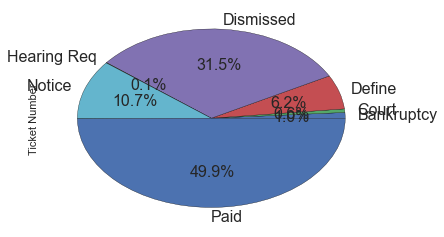

In [27]:
taxi_fine_status = taxi_ticket_fines.groupby(['Ticket Queue'])['Ticket Number'].count()
taxi_fine_status.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

## Ticket Totals, Cost

### Notes

* Total revenue from tickets is almost $8 million
* About half of tickets issued to taxis were paid

In [28]:
print('Total number of tickets issued to taxis between 2009 and March 2016: {}'.format(taxi_ticket_fines['Ticket Number'].count()))
paid_taxi_tickets = taxi_ticket_fines[taxi_ticket_fines['Ticket Queue'] == 'Paid']
print('Total number of paid tickets issued to taxis between 2009 and March 2016: {}'.format(paid_taxi_tickets['Ticket Number'].count()))

Total number of tickets issued to taxis between 2009 and March 2016: 261936
Total number of paid tickets issued to taxis between 2009 and March 2016: 130663


In [29]:
print('Total revenue from these tickets: ${:,.2f}'.format(paid_taxi_tickets['Ticket Fine'].sum()))

Total revenue from these tickets: $7,860,250.00


## Tickets, Cost by Plate

### Notes

* The average plate (not necessarily a single driver) was issued almost \$1,000 in tickets between 2009 and March 2016
* The average plate received almost 14 tickets in that time frame

Mean tickets per plate number from 2009 to March 10, 2016: 13.8142811906


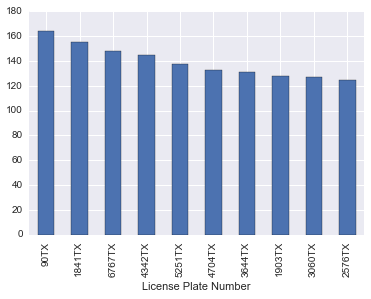

In [30]:
taxi_tickets_plate = taxi_ticket_fines.groupby(['License Plate Number'])['Ticket Number'].count()
taxi_tickets_plate = taxi_tickets_plate.sort_values(ascending=False)
top_tickets_plate = taxi_tickets_plate[:10]

mean_tickets_plate = taxi_tickets_plate.mean()
print('Mean tickets per plate number from 2009 to March 10, 2016: {}'.format(mean_tickets_plate))
top_tickets_plate.plot(kind='bar')

Mean total fines per plate number from 2009 to March 10, 2016: 926.321775385


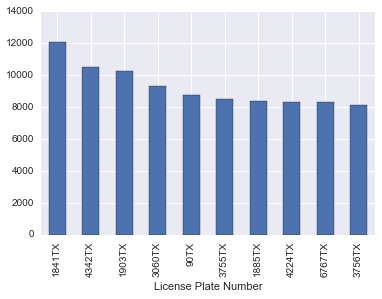

In [37]:
taxi_fine_plate = taxi_ticket_fines.groupby(['License Plate Number'])['Ticket Fine'].sum()
taxi_fine_plate = taxi_fine_plate.sort_values(ascending=False)
top_fine_plate = taxi_fine_plate[:10]

mean_fine_plate = taxi_fine_plate.mean()
print('Mean total fines per plate number from 2009 to March 10, 2016: {}'.format(mean_fine_plate))
top_fine_plate.plot(kind='bar')

## Yearly Tickets by Plate

### Notes
* The average plate received about 4.3 tickets a year in the time frame looked at 
* For the same time period, the average plate (more likely a single driver if only looking at one year) received almost \$300 in parking tickets

In [33]:
taxi_ticket_fines = taxi_ticket_fines.set_index(pd.DatetimeIndex(taxi_ticket_fines['Issue Date']))
taxi_ticket_fines['Year'] = taxi_ticket_fines.index.year
print(taxi_ticket_fines.dtypes)

Ticket Number                     int64
License Plate Number             object
License Plate State              object
License Plate Type               object
Ticket Make                      object
Issue Date               datetime64[ns]
Violation Location               object
Violation Code                   object
Violation Description            object
Badge                            object
Unit                             object
Ticket Queue                     object
Hearing Dispo                    object
Latitude                        float64
Longitude                       float64
Ward                              int64
Ticket Fine                     float64
Year                              int32
dtype: object


Mean yearly tickets per plate number from 2009 to March 10, 2016: 4.3212817592


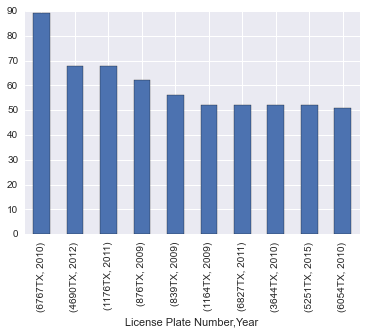

In [35]:
tickets_plate_year = taxi_ticket_fines.groupby(['License Plate Number', 'Year'])['Ticket Number'].count()
tickets_plate_year = tickets_plate_year.sort_values(ascending=False)
top_tickets_plate_year = tickets_plate_year[:10]

mean_tickets_plate_year = tickets_plate_year.mean()
print('Mean yearly tickets per plate number from 2009 to March 10, 2016: {}'.format(mean_tickets_plate_year))
top_tickets_plate_year.plot(kind='bar')

Mean yearly total fines per plate number from 2009 to March 10, 2016: 289.765159394


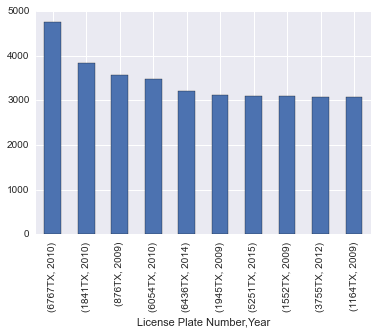

In [39]:
taxi_fine_plate_year = taxi_ticket_fines.groupby(['License Plate Number', 'Year'])['Ticket Fine'].sum()
taxi_fine_plate_year = taxi_fine_plate_year.sort_values(ascending=False)
top_fine_plate_year = taxi_fine_plate_year[:10]

mean_fine_plate_year = taxi_fine_plate_year.mean()
print('Mean yearly total fines per plate number from 2009 to March 10, 2016: {}'.format(mean_fine_plate_year))
top_fine_plate_year.plot(kind='bar')